# Part II - (Ford GoBike system Data Exploratory Analysis and Visualization)
## by (Amulya Kandukuri)


## Investigation Overview


> I am investigating the details of Bike trips in Ford GoBike dataset. I am exploring the details about the trips that happen during particular hour, time of day and weekday. I intend to compare trips taken by subscribers and customers in terms of duration in seconds and minutes. I intend to visualize the findings about longest trips, busiest trip taken hours, age of members whether that is customer or subscriber.

## Dataset Overview

>The dataset includes information about bike trips covering San Francisco area. 
>This dataset includes information about various trips like duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, bike_share_for_all_trip. 
>This dataset mainly focus on rides in February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 14.4MB/s ta 0:00:01
  Found existing installation: seaborn 0.8.1
    Uninstalling seaborn-0.8.1:
      Successfully uninstalled seaborn-0.8.1


In [3]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('fordgobike-tripdata.csv')
bike_data.info()
print('shape:',bike_data.shape)
bike_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
shape: (183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#making a copy of dataset
bike_data_original = bike_data.copy()
bike_data_original.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# drop irrelevant columns
bike_data.drop(['end_time', 'start_station_id','start_station_latitude', 
                'start_station_longitude', 'end_station_id',
                'end_station_latitude', 'end_station_longitude'], axis = 1, inplace = True)
bike_data.dropna(axis = 0, inplace=True)
bike_data.head()

,duration_sec,start_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


In [6]:
#making 'start_time' column as datetime datatype
bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])

#defining morning, afternoon, evening and night times of day
bike_data['start_hour'] = bike_data['start_time'].dt.hour
bike_data['time_day'] = 'Morning'
bike_data['time_day'][(bike_data['start_hour'] >= 12) & (bike_data['start_hour'] < 18)] = 'Afternoon'
bike_data['time_day'][(bike_data['start_hour'] >= 18) & (bike_data['start_hour'] < 24)] = 'Evening'
bike_data['time_day'][(bike_data['start_hour'] >= 0) & (bike_data['start_hour'] <= 6)] = 'Night'

# defining day of week
bike_data['day_of_week'] = bike_data['start_time'].dt.weekday_name



## Distribuiton of Bike Trips in day hours

* There is a peak in number of trips taken at 17 th hour and 8th hour of day with more than 20000 times. 
* The next most trips are at 9th hour and 18th hour of day with more than 15000 times.
* The least number of trips were taken during 3rd and 4th hours of day with less than 1000 trips

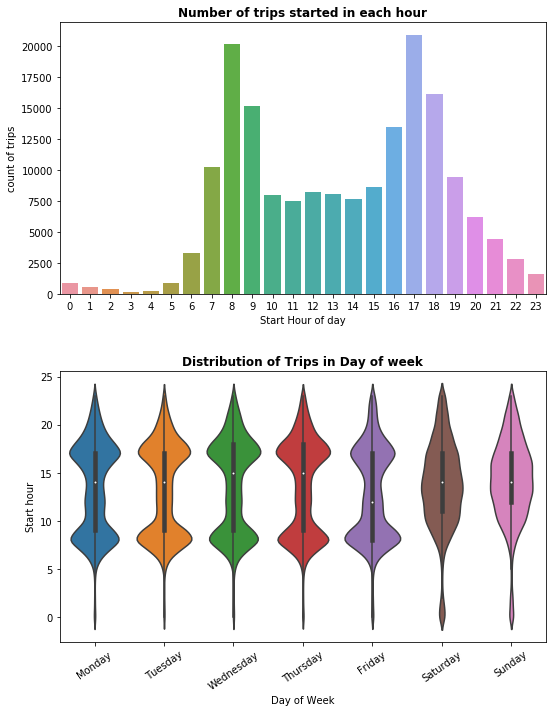

In [8]:
# Number of trips during each hour of day
hour_count = bike_data['start_hour'].value_counts()
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(15,10))
sb.barplot(x=hour_count.index , y = hour_count, ax = ax0)
ax0.set_xlabel('Start Hour of day')
ax0.set_ylabel('count of trips')
ax0.set_title('Number of trips started in each hour',fontweight='bold');


day_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_week_cate = pd.api.types.CategoricalDtype(ordered=True,categories=day_week)
bike_data['day_of_week'] = bike_data['day_of_week'].astype(day_week_cate)

sb.violinplot(data = bike_data, x = 'day_of_week', y = 'start_hour', ax = ax2)
ax2.tick_params(axis='x', rotation=35)
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Start hour')
ax2.set_title('Distribution of Trips in Day of week',fontweight='bold');
ax1.set_visible(False)
ax3.set_visible(False)
fig.tight_layout(h_pad=3, w_pad=3)
plt.savefig("one.png");

## Trip duration and Number of trips

* The histogram is right-skewed with most number of trips below 726 seconds.
* The most number of trips has duration less than 700 seconds.
* there are approximately 25000 trips with duration around 400 seconds.

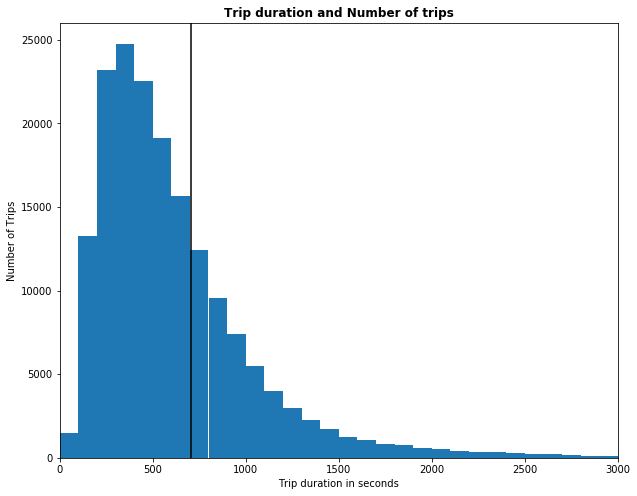

In [9]:
# number of trips
bins = np.arange(0,bike_data['duration_sec'].max()+100,100)
plt.figure(figsize=(10,8))
plt.hist(data = bike_data, x ='duration_sec',bins = bins)
#average duration of trip
plt.axvline(bike_data['duration_sec'].mean(), color = 'k')
plt.xlim(0,3000)
plt.xlabel('Trip duration in seconds')
plt.ylabel('Number of Trips')
plt.title('Trip duration and Number of trips',fontweight='bold');
plt.savefig("two.png")

## Weekday Bike Trips

* The most number of trips occurred on Thursday with more than 35000 trips and least number on Saturday with less than 15000 trips. 
* The order of number of trips occurred on each day ranking from the highest to the lowest are: Thursday, Tuesday, Wednesday, Friday, Monday, Sunday and Saturday. 

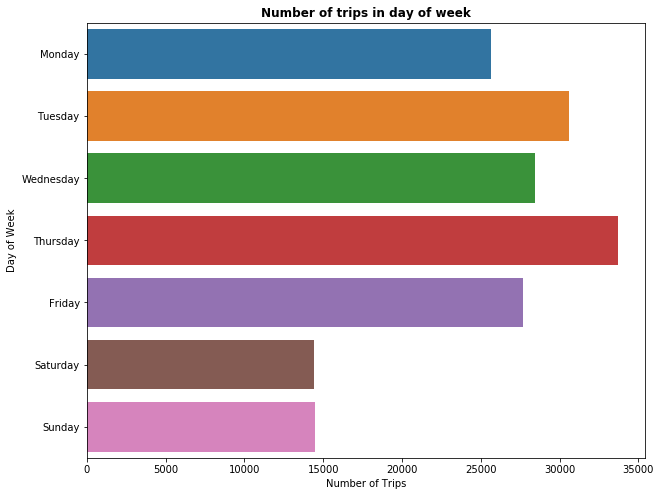

In [10]:
# trips during week
plt.figure(figsize=(10,8))
week_count = bike_data['day_of_week'].value_counts()
sb.barplot(y = week_count.index, x = week_count)
plt.xlabel('Number of Trips')
plt.ylabel('Day of Week')
plt.title('Number of trips in day of week',fontweight='bold');
plt.savefig("three.png");

## Distribution of age among members

* The most number of members are in the age 34 years with more than 10000 members. 
* The average age of members is 37 years. The minimum age of the members is 21 years.
* The least number of members are in the age above 65 years with less than 1000 members in each year.

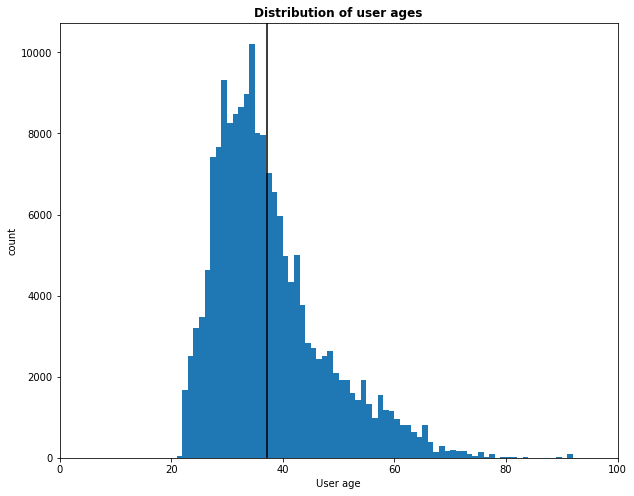

In [11]:
#distribution of user age along with average age
bike_data['age'] = bike_data['member_birth_year'].apply(lambda x: 2022-x)
bins = np.arange(0, bike_data['age'].max()+1,1)
plt.figure(figsize=(10,8))
plt.hist(x = bike_data['age'].dropna(),bins = bins)
plt.xlim(0,100)
plt.xlabel('User age')
plt.ylabel('count')
plt.title('Distribution of user ages',fontweight='bold')
plt.axvline(bike_data['age'].mean(), color='k');
plt.savefig("four.png");

## Distribution of User Types

* There are most number of trips occurred due to subscribers which are approximately 160000. 
* The number of customers are below 20000.

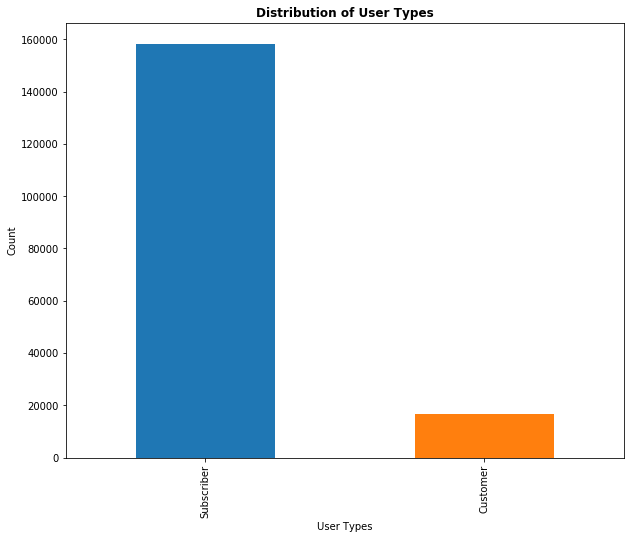

In [12]:
#distribution of number of subscribers and number of customers
user_counts = bike_data['user_type'].value_counts()
fig, ax0 = plt.subplots(1,1,figsize=(10,8))
user_counts.plot(ax = ax0, kind='bar')
ax0.set_title('Distribution of User Types',fontweight='bold')
ax0.set_xlabel('User Types')
ax0.set_ylabel('Count');
plt.savefig("five.png");

## Average trip duration by day and user type

* Most trip duration occurred during Saturday and Sunday at 25-30 minutes with a standard deviation little more than 30 minutes by customers. 
* Most trip duration occurred during Saturday and Sunday at 10-11 minutes with a standard deviation little more than 10 minutes by subscribers. 
* The least trip duration is on Tuesday by customers with 15-17 minutes trip duration.
* The least trip duration is on Tuesday by subscribers with 10 minutes trip duration.

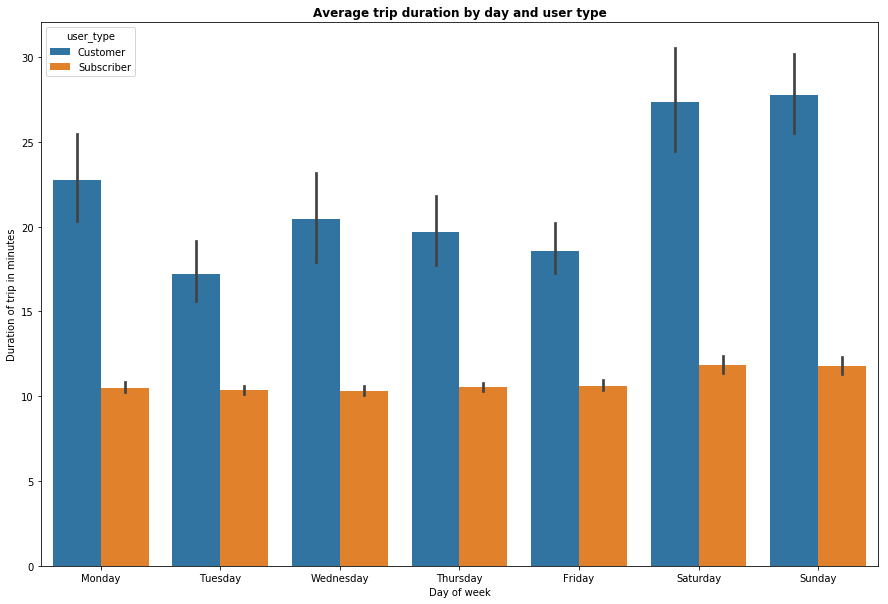

In [13]:
#day of week vs usertype vs duration
plt.figure(figsize=(15,10))
sb.barplot(data = bike_data,x='day_of_week', y=bike_data['duration_sec']/60, hue='user_type');
plt.xlabel('Day of week')
plt.ylabel('Duration of trip in minutes')
plt.title('Average trip duration by day and user type',fontweight='bold');
plt.savefig("six.png");

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
